<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/code/01ZLMA_ex07_prusek_nesnerova_adamek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 07 of the course 01ZLMA.

# GLM for Discrete response - Binary Data Analysis

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} n_i = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

* The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$g(\pi_i)=log(\frac{\pi_i}{1-\pi_i}) $$

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} = \frac{e^{x_i^T \beta}}{1+e^{x_i^T \beta}} $$

* **Logistic regression** is a GLM with binomial family and logit link


**Probit function:**

* The CDF of the normal distribution.
$$\pi_i = \Phi({x_i^T \beta}) $$


**Cauchit function:**

* The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$


**Complementary log-log (cloglog) function:**

* The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

* The counter part of the cloglog function is log-log link function.

Likelihood:
$$L_n (\beta, Y) = \prod_{i=1}^{K} \prod_{j=1}^{n_i} \pi_i^{Y_{ij}} (1-\pi_i)^{1-Y_{ij}}$$

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.genmod.families.links import Logit, Probit, Cauchy, CLogLog, LogLog
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import pandas as pd
from scipy.stats import norm

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import norm


In [ ]:
# Set the display width to avoid automatic wrapping of the display
pd.set_option('display.width', 200)

# Increase maximum column width to see more data within each cell
pd.set_option('display.max_colwidth', 50)

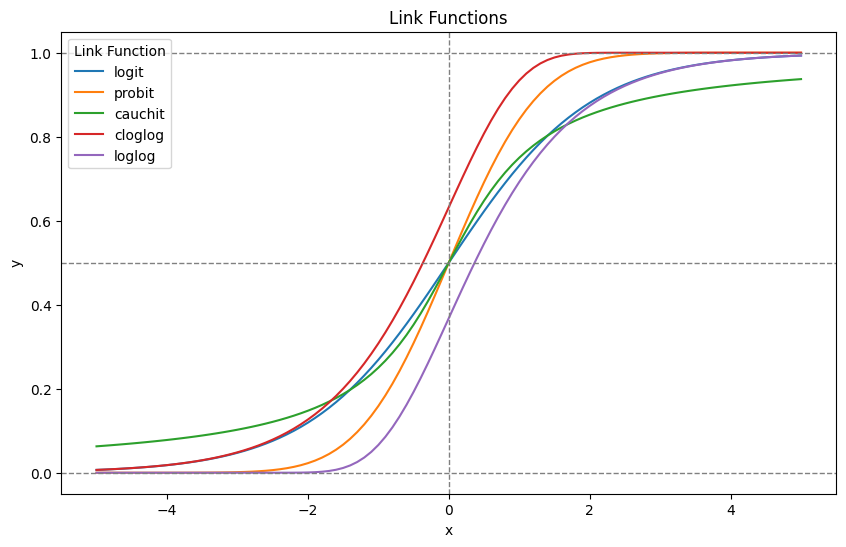

In [ ]:
# Define the link functions and names
links = [Logit(), Probit(), Cauchy(), CLogLog(), LogLog()]
link_names = ['logit', 'probit', 'cauchit', 'cloglog', 'loglog']

# Create a sequence of x values and DataFrame
x = np.linspace(-5, 5, 101)
df = pd.DataFrame()

for link, name in zip(links, link_names):
    y = link.inverse(x)
    temp_df = pd.DataFrame({'x': x, 'y': y, 'link_name': name})
    df = pd.concat([df, temp_df])

# Plotting
plt.figure(figsize=(10, 6))
for name in link_names:
    subset = df[df['link_name'] == name]
    plt.plot(subset['x'], subset['y'], label=name)

plt.title('Link Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Link Function')

plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.show()


## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [ ]:
# Load the Titanic dataset from seaborn package
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [ ]:
# Load the R magic extension
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("titanic")
library(titanic)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/titanic_0.1.0.tar.gz'
Content type 'application/x-gzip' length 71672 bytes (69 KB)
downloaded 69 KB


The downloaded source packages are in
	‘/tmp/RtmpTa6PVp/downloaded_packages’


In [ ]:
%%R -o titanic_train -o titanic_test

NULL


In [ ]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
...,...,...,...,...,...,...,...,...,...,...,...
414,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,,S
415,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
416,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S
417,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,,S


In [ ]:
# Summarize the datasets
print("Summary of Train Dataset (Numeric):")
print(titanic_train.describe())
print("\nSummary of Train Dataset (Categorical):")
print(titanic_train.describe(include=['O']))

#print("\nSummary of Test Dataset (Numeric):")
#print(titanic_test.describe())
#print("\nSummary of Test Dataset (Categorical):")
#print(titanic_test.describe(include=['O']))

# Count missing values
print("\nNumber of NAs in Train Dataset:")
print(titanic_train.isna().sum())
#print("\nNumber of NAs in Test Dataset:")
#print(titanic_test.isna().sum())

Summary of Train Dataset (Numeric):
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Summary of Train Dataset (Categorical):
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   891

We will modify dataset_train for our academic purpose :-)

### Model where all covariates are discrete (Use DF called `data_dis`)

In [ ]:
# Load data and select columns
data_dis = titanic_train[['Survived', 'Pclass', 'Sex', 'Embarked']]

# Convert string columns to categorical
data_dis = data_dis.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)
print("Summary after conversion to categorical:")
print(data_dis.describe(include='all'))

# Filter and transmute
data_dis = data_dis[data_dis['Embarked'].isin(['C', 'Q', 'S'])]
data_dis = data_dis.assign(
    survived=data_dis['Survived'].astype('category'),
    classes=data_dis['Pclass'].astype('category'),
    sex=data_dis['Sex'].astype('category'),
    embarked=data_dis['Embarked'].astype('category')
)
data_dis = data_dis[['survived', 'classes', 'sex', 'embarked']]



Summary after conversion to categorical:
          Survived      Pclass   Sex Embarked
count   891.000000  891.000000   891      891
unique         NaN         NaN     2        4
top            NaN         NaN  male        S
freq           NaN         NaN   577      644
mean      0.383838    2.308642   NaN      NaN
std       0.486592    0.836071   NaN      NaN
min       0.000000    1.000000   NaN      NaN
25%       0.000000    2.000000   NaN      NaN
50%       0.000000    3.000000   NaN      NaN
75%       1.000000    3.000000   NaN      NaN
max       1.000000    3.000000   NaN      NaN



Summary of final data:
        survived  classes   sex embarked
count        889      889   889      889
unique         2        3     2        3
top            0        3  male        S
freq         549      491   577      644

Structure of final data:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  889 non-null    category
 1   classes   889 non-null    category
 2   sex       889 non-null    category
 3   embarked  889 non-null    category
dtypes: category(4)
memory usage: 43.2+ KB
None


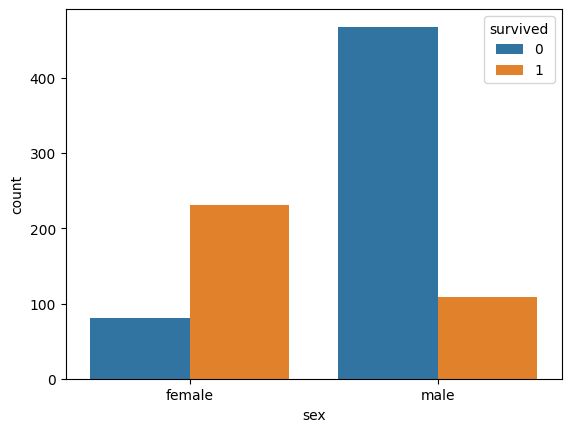

In [ ]:
sns.countplot(x='sex', hue='survived', data=data_dis)

# Output the summary and structure
print("\nSummary of final data:")
print(data_dis.describe(include='all'))
print("\nStructure of final data:")
print(data_dis.info())


In [ ]:
# Creating a contingency table and heatmap for each pair of categorical variables
for col1 in data_dis.columns:
    for col2 in data_dis.columns:
        if col1 > col2:
            contingency_table = pd.crosstab(data_dis[col1], data_dis[col2])
            print(contingency_table)
            print("-------------------")
            #sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
            #plt.title(f'Contingency Table between {col1} and {col2}')
            #plt.show()


classes     1   2    3
survived              
0          80  97  372
1         134  87  119
-------------------
sex       female  male
survived              
0             81   468
1            231   109
-------------------
embarked   C   Q    S
survived             
0         75  47  427
1         93  30  217
-------------------
classes    1    2    3
sex                   
female    92   76  144
male     122  108  347
-------------------
embarked   C   Q    S
sex                  
female    73  36  203
male      95  41  441
-------------------
classes     1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353
-------------------


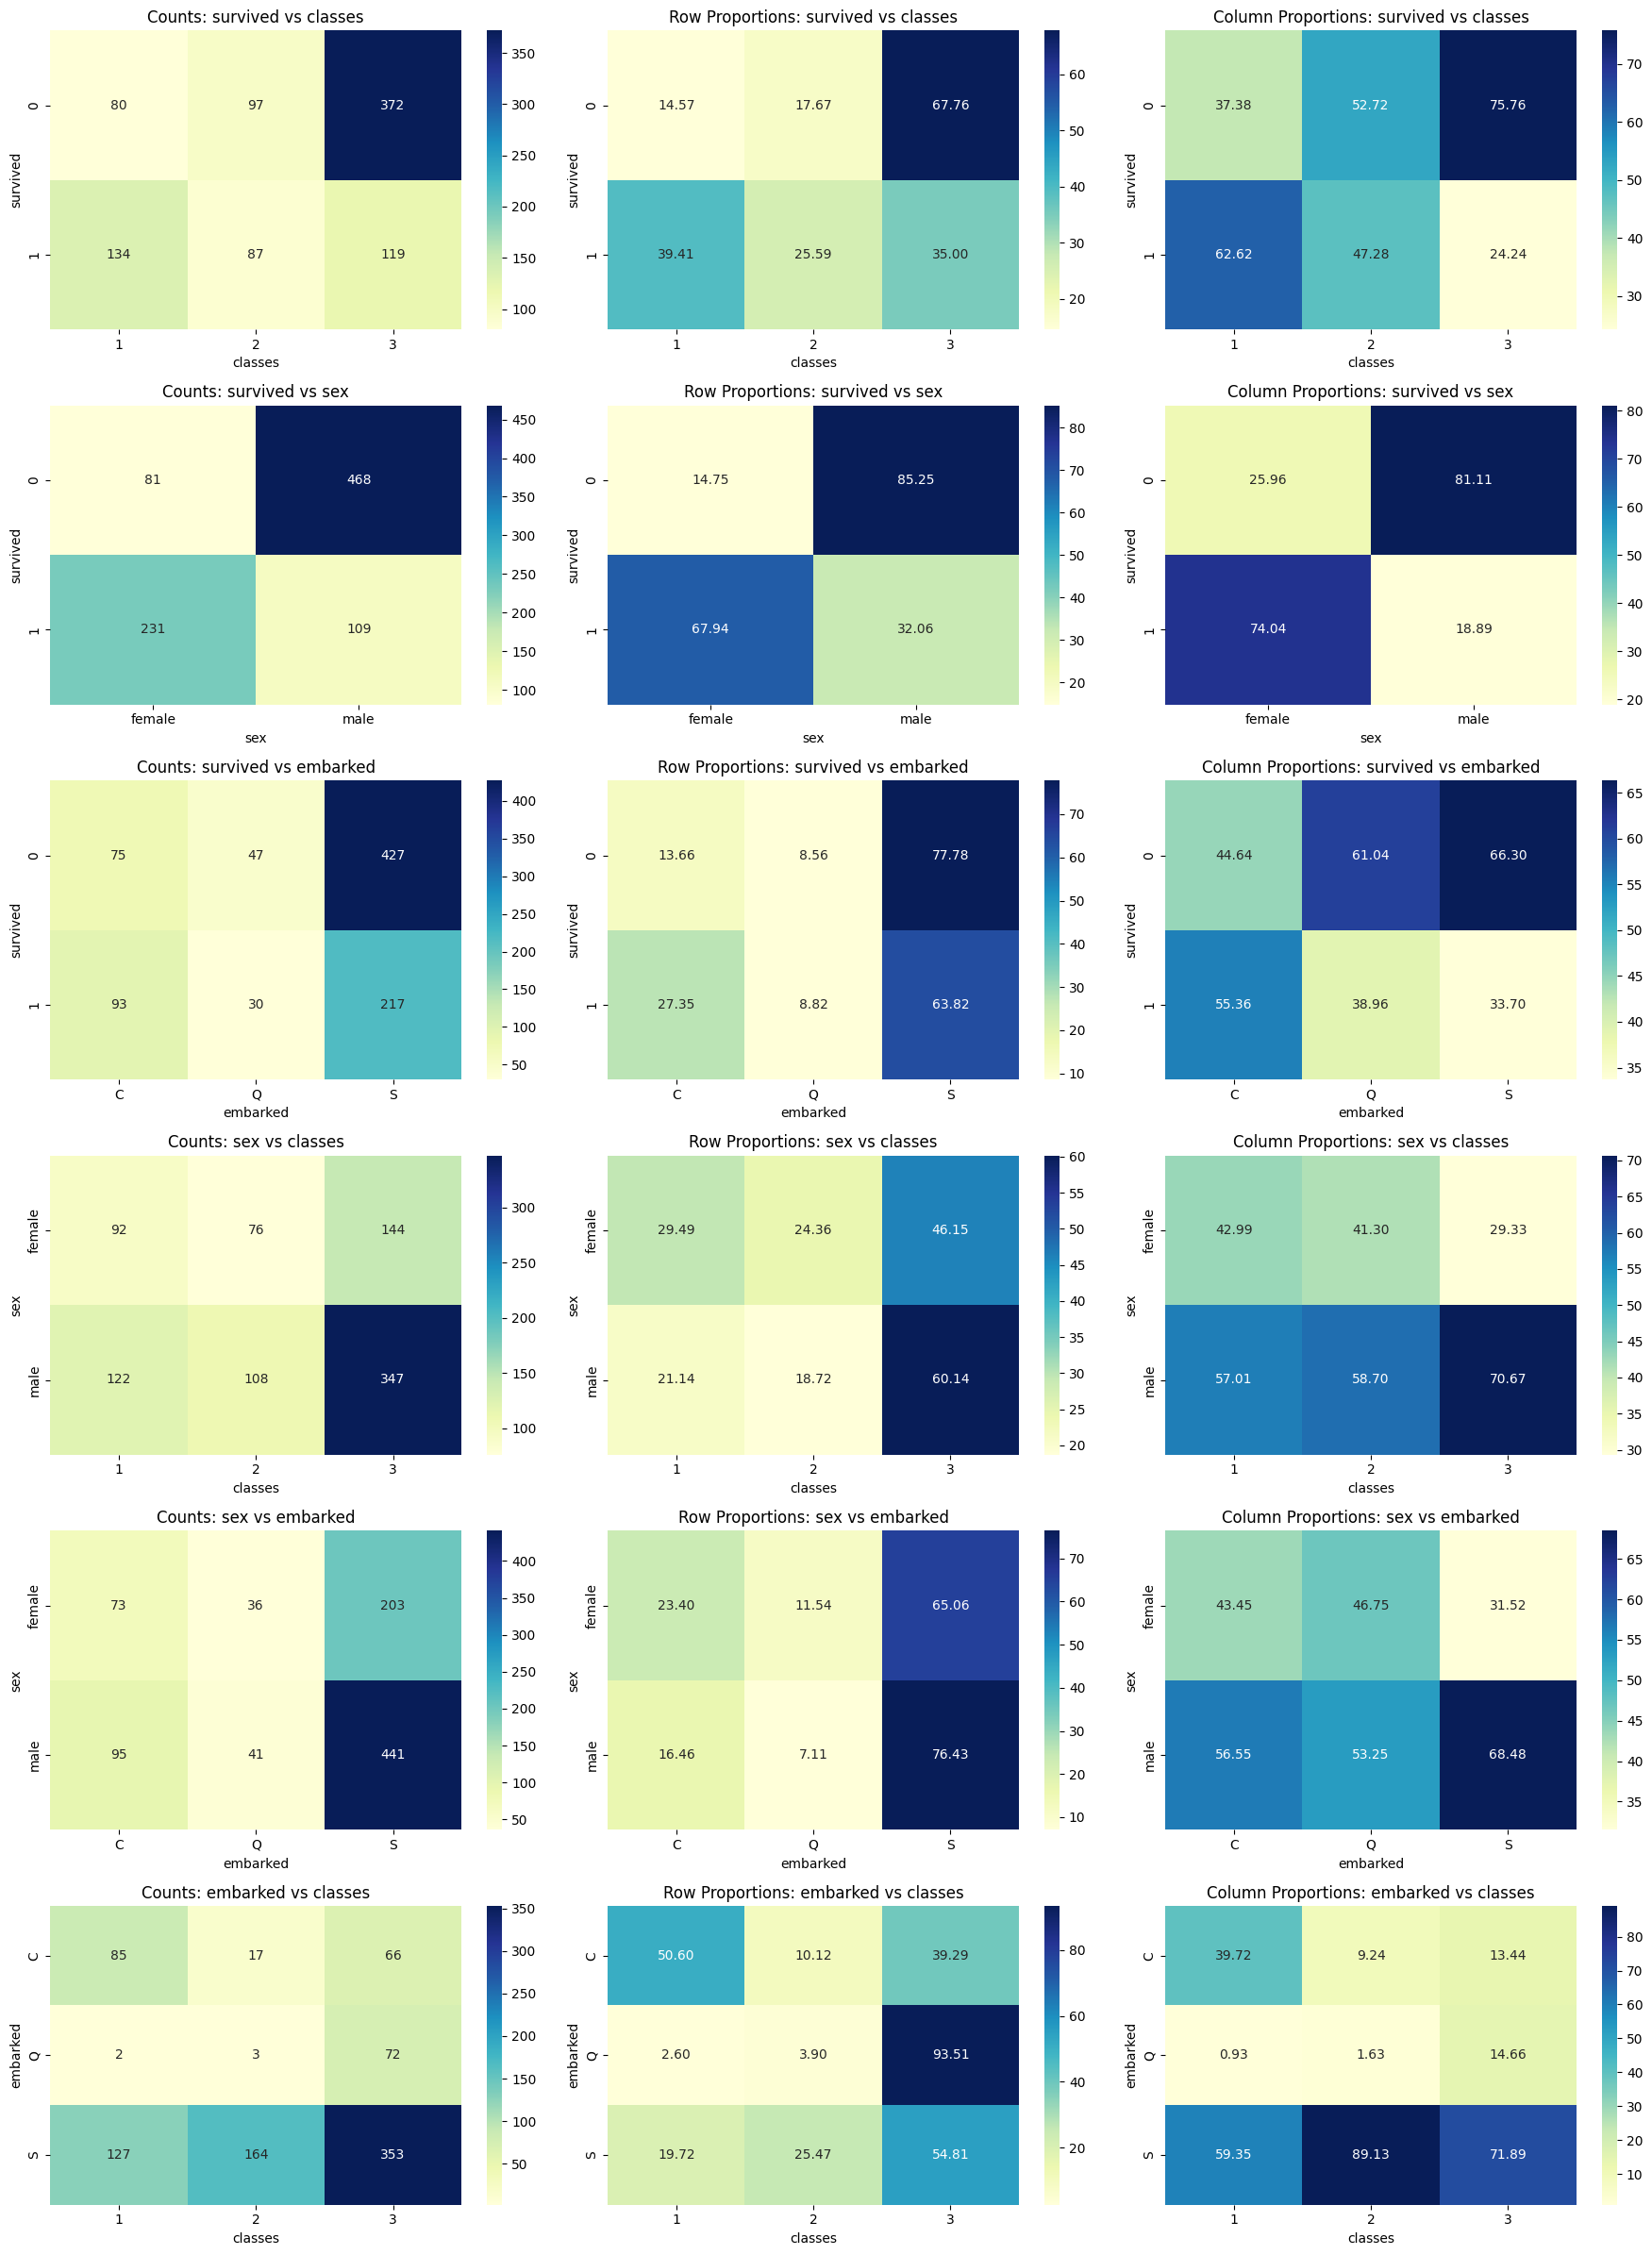

In [ ]:
#Print all heat maps
fig, axes = plt.subplots(nrows=len(data_dis.columns)*(len(data_dis.columns)-1)//2, ncols=3, figsize=(18, 6*len(data_dis.columns)))

row_index = 0  # Initialize row index for subplots
for col1 in data_dis.columns:
    for col2 in data_dis.columns:
        if col1 > col2:  # To avoid repeated pairings and self-pairings
            # Compute the contingency table
            contingency_table = pd.crosstab(data_dis[col1], data_dis[col2])

            # Compute row proportions (margin=1 in R's prop.table)
            row_proportions = pd.crosstab(data_dis[col1], data_dis[col2], normalize='index') * 100

            # Compute column proportions (margin=2 in R's prop.table)
            column_proportions = pd.crosstab(data_dis[col1], data_dis[col2], normalize='columns') * 100

            # Plotting the raw count contingency table
            ax = axes[row_index, 0]
            sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
            ax.set_title(f'Counts: {col1} vs {col2}')
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)

            # Plotting row proportions
            ax = axes[row_index, 1]
            sns.heatmap(row_proportions, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
            ax.set_title(f'Row Proportions: {col1} vs {col2}')
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)

            # Plotting column proportions
            ax = axes[row_index, 2]
            sns.heatmap(column_proportions, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
            ax.set_title(f'Column Proportions: {col1} vs {col2}')
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)

            row_index += 1  # Increment row index for the next set of plots

plt.tight_layout()
plt.show()


### Odds Ratio from a 2×2 Contingency Table

|              | Exposure = 0 (Female) | Exposure = 1 (Male) |
|--------------|-----------------------|----------------------|
| Outcome = 0  |           c           |          d           |
| Outcome = 1  |           a           |          b           |

$$
\text{OR} = \frac{b \cdot c}{a \cdot d}
$$
The odds of survival for males compared to females.

In [ ]:
# Manual computaion of OR
def odds_ratio(table2x2):
    """Calculate the odds ratio for a 2x2 contingency table."""
    # Extract values from the table
    c = table2x2.iloc[0, 0]
    d = table2x2.iloc[0, 1]
    a = table2x2.iloc[1, 0]
    b = table2x2.iloc[1, 1]

    # Calculate the odds ratio
    return (b * c)/(a * d)


In [ ]:
# 2x2 Contingency table
table_sex = pd.crosstab(data_dis['survived'], data_dis['sex'])

# Display the contingency table
print("Contingency Table for Survival vs Sex:")
print(table_sex)

# Calculate and print the odds ratio
or_value = odds_ratio(table_sex)
print(f"Odds Ratio: {or_value:.4f}")

Contingency Table for Survival vs Sex:
sex       female  male
survived              
0             81   468
1            231   109
Odds Ratio: 0.0817


In [ ]:
from statsmodels.stats.contingency_tables import Table2x2

# Convert the crosstab to a Table2x2 object
table_data = table_sex.values  # Extract the values from the crosstab
table = Table2x2(table_data)

# Calculate odds ratio and confidence interval
odds_ratio = table.oddsratio
confidence_interval = table.oddsratio_confint()

print(f"Odds Ratio: {odds_ratio}")
print(f"Confidence Interval: {confidence_interval}")

Odds Ratio: 0.08166833166833166
Confidence Interval: (np.float64(0.058837834196950954), np.float64(0.11335761230032254))


That means males had about 12× higher odds of dying than females.


### Task
Delta Method (https://en.wikipedia.org/wiki/Delta_method): Roughly, if there is a sequence of random variables \( X_n \) satisfying

$$
\sqrt{n}(X_n - \theta) \xrightarrow{D} \mathcal{N}(0, \sigma^2),
$$

where $ \theta $ and $ \sigma^2 $ are finite-valued constants and $ \xrightarrow{D} $ denotes **convergence in distribution**, then for any differentiable function $ g $ such that the first derivative $ g'(\theta) $ exists and is non-zero:

$$
\sqrt{n}(g(X_n) - g(\theta)) \xrightarrow{D} \mathcal{N}\left(0, \sigma^2 \cdot [g'(\theta)]^2\right).
$$

This result is useful for approximating the distribution of smooth (nonlinear) transformations of asymptotically normal estimators.

* Assume that each cell is independent and modeled as Poisson distribution, derivate the code `se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)` by the use of delta method.

* Assume logistic regression and let

  - $Y_i \in \{0, 1\}$ be the binary outcome
  - $X_i \in \{0, 1\}$ be a binary predictor
  - $\text{logit}(p_i) = \beta_0 + \beta_1 X_i$

  So:

  - $p_i = \mathbb{P}(Y_i = 1 | X_i)$

  We organize the data into a 2×2 contingency table:

| Group ($X$) | Successes ($Y=1$) | Failures ($Y=0$) | Total |
|-------------|-------------------|------------------|--------|
| $X=0$       | a               | b              | a+b  |
| $X=1$       | c               | d              | c+d  |

  and define:

  - $\pi_0 = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$
  - $\pi_1 = \frac{e^{\beta_0 + \beta_1}}{1 + e^{\beta_0 + \beta_1}}$

  Then the log-likelihood is:

  $$
  \ell(\beta_0, \beta_1) =
  a \log(\pi_0) + b \log(1 - \pi_0) +
  c \log(\pi_1) + d \log(1 - \pi_1)
  $$

  Derive the Fisher Information matrix for a simple logistic regression with a **single binary predictor**, and show that the variance of the coefficient corresponds to:

$$
\text{SE}^2(\hat{\beta}_1) = \frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d}
$$

---


In [ ]:
def combined_or_ci(data, formula='survived ~ sex'):
    """
    Computes odds ratio and 95% confidence intervals using:
    - Contingency table approximation
    - Empirical delta method (cell-based)
    - GLM model coefficient (Fisher Information)
    - Exact Delta method matching Fisher Information
    """

    # Fit logistic regression
    model = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit()

    # Extract predictor term name (assumes 1 binary predictor)
    term = [t for t in model.params.index if t != 'Intercept'][0]
    beta = model.params[term]
    se_beta = model.bse[term]
    z = norm.ppf(0.975)

    # OR and CI from regression coefficient (Fisher Information)
    or_model = np.exp(beta)
    ci_model = np.exp([beta - z * se_beta, beta + z * se_beta])

    # Build contingency table from data
    target, predictor = formula.split('~')
    target = target.strip()
    predictor = predictor.strip()
    table = pd.crosstab(data[target], data[predictor])

    # Assume format: rows=[0 (failure), 1 (success)], columns=[baseline, group]
    a = table.iloc[1, 0]  # successes baseline
    b = table.iloc[0, 0]  # failures baseline
    c = table.iloc[1, 1]  # successes group
    d = table.iloc[0, 1]  # failures group

    # OR from table
    or_tab = (a * d) / (b * c)
    log_or_tab = np.log(or_tab)

    # --- Approximate SE from table
    se_table_approx = np.sqrt(1/a + 1/b + 1/c + 1/d)
    ci_table_approx = np.exp([log_or_tab - z * se_table_approx, log_or_tab + z * se_table_approx])

    # --- Empirical delta method (cell-based)
    def binomial_var_log(n, x):
        if x == 0 or n == 0:
            return np.nan
        p = x / n
        return (1 - p) / (n * p)

    row0 = a + b
    row1 = c + d

    var_log_a = binomial_var_log(row0, a)
    var_log_b = binomial_var_log(row0, b)
    var_log_c = binomial_var_log(row1, c)
    var_log_d = binomial_var_log(row1, d)

    se_empirical_delta = np.sqrt(var_log_a + var_log_b + var_log_c + var_log_d)
    ci_empirical_delta = np.exp([log_or_tab - z * se_empirical_delta, log_or_tab + z * se_empirical_delta])

    # --- Exact Delta method matching Fisher Information
    # Group-level predictions (MLE probabilities)
    p0_hat = a / (a + b)
    p1_hat = c / (c + d)

    var_exact_delta = (1 / ((a + b) * p0_hat * (1 - p0_hat)) +
                       1 / ((c + d) * p1_hat * (1 - p1_hat)))

    se_exact_delta = np.sqrt(var_exact_delta)
    ci_exact_delta = np.exp([log_or_tab - z * se_exact_delta, log_or_tab + z * se_exact_delta])

    return {
        'odds_ratio_model': or_model,
        'ci_model_fisher': ci_model,
        'ci_table_approx': ci_table_approx,
        'ci_empirical_delta': ci_empirical_delta,
        'ci_exact_delta_fisher': ci_exact_delta,
        'se_model_fisher': se_beta,
        'se_table_approx': se_table_approx,
        'se_empirical_delta': se_empirical_delta,
        'se_exact_delta_fisher': se_exact_delta
    }


In [ ]:
res = combined_or_ci(data_dis)

print(f"Odds Ratio (model) = {res['odds_ratio_model']:.4f}")
print(f"95% CI from GLM Fisher SE = [{res['ci_model_fisher'][0]:.4f}, {res['ci_model_fisher'][1]:.4f}]")
print(f"95% CI Table Approx = [{res['ci_table_approx'][0]:.4f}, {res['ci_table_approx'][1]:.4f}]")
print(f"95% CI Empirical Delta = [{res['ci_empirical_delta'][0]:.4f}, {res['ci_empirical_delta'][1]:.4f}]")
print(f"95% CI Exact Delta (matches Fisher) = [{res['ci_exact_delta_fisher'][0]:.4f}, {res['ci_exact_delta_fisher'][1]:.4f}]")


Odds Ratio (model) = 12.2446
95% CI from GLM Fisher SE = [8.8216, 16.9959]
95% CI Table Approx = [8.8216, 16.9959]
95% CI Empirical Delta = [9.4059, 15.9402]
95% CI Exact Delta (matches Fisher) = [8.8216, 16.9959]


chi-squared test
* Null hypothesis (H₀): The variables sex and survived are independent (i.e., survival does not depend on gender).
* Alternative hypothesis (H₁): The variables are dependent (i.e., survival does depend on gender).

In [ ]:
table_sex

sex,female,male
survived,,
0,81,468
1,231,109


In [ ]:
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(table_sex)

print(f"Chi-squared Test Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-squared Test Statistic: 258.4266
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[192.67491564 356.32508436]
 [119.32508436 220.67491564]]


### Null model

* Compute the null model (assume that the probability of survival was the same for all passangers)

* How do we interpret estimated parameter?

In [ ]:
# Convert 'survived' to integer for statsmodels compatibility
#data_dis['survived'] = data_dis['survived'].astype(int)

# Adding a constant term for the intercept
#data_dis['intercept'] = 1

# Define the model
#model = sm.GLM(data_dis['survived'], data_dis[['intercept']], family=sm.families.Binomial(link=sm.genmod.families.links.logit()))

data_dis['survived'] = data_dis['survived'].astype(int)
# Define the model
model = smf.glm(formula='survived ~ 1', family=sm.families.Binomial(link=sm.genmod.families.links.Logit()), data = data_dis)

# Fit the model
mod0 = model.fit()

# Print the summary of the model
print(mod0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      888
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -591.41
Date:                Tue, 22 Apr 2025   Deviance:                       1182.8
Time:                        17:23:12   Pearson chi2:                     889.
No. Iterations:                     4   Pseudo R-squ. (CS):          2.220e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4792      0.069     -6.943      0.0

In [ ]:
# The chances of survival according to training data.

odds_ratio = np.exp(mod0.params)
print("Odds Ratios:")
print(odds_ratio)

Odds Ratios:
Intercept    0.619308
dtype: float64


In [ ]:
# The probability of survival.
probabilities = odds_ratio / (1 + odds_ratio)
print("Probabilities:")
print(probabilities)

Probabilities:
Intercept    0.382452
dtype: float64


In [ ]:
data_dis.dtypes

,0
survived,int64
classes,category
sex,category
embarked,category


In [ ]:
data_dis['survived'].value_counts(normalize=True)


,proportion
survived,
0,0.617548
1,0.382452


In [ ]:
np.mean(data_dis['survived'].astype(int))

np.float64(0.38245219347581555)

### Model with varaible: sex

* Compute the model with one covariate sex.

* How can we interpret estimated coefficients?

* Did survival depend on gender (`sex`) ?

* Perform an appropriate tests.

* Did women have a better chance of survival?


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the logistic regression model where 'survived' is the response and 'sex' is the predictor
data_dis['survived'] = data_dis['survived'].astype(int)
data_dis['sex'] = data_dis['sex'].astype('category')

mod_sex = smf.glm(formula='survived ~ sex', data=data_dis, family=sm.families.Binomial()).fit()

# Display the summary of the model
print(mod_sex.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.30
Date:                Tue, 22 Apr 2025   Deviance:                       916.61
Time:                        17:23:12   Pearson chi2:                     889.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0480      0.129      8.116      

In [ ]:
# Calculate the odds ratios for the coefficients
odds_ratios = np.exp(mod_sex.params)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
Intercept      2.851852
sex[T.male]    0.081668
dtype: float64


In [ ]:
# Extract coefficient and standard error for 'sex'
beta = mod_sex.params['sex[T.male]']
se = mod_sex.bse['sex[T.male]']

# Compute 95% CI on log-odds scale
z = norm.ppf(0.975)  # z-score for 95% CI
ci_lower_logit = beta - z * se
ci_upper_logit = beta + z * se

# Convert to OR scale
or_estimate = np.exp(beta)
ci_lower_or = np.exp(ci_lower_logit)
ci_upper_or = np.exp(ci_upper_logit)

# Display results
print(f"Odds Ratio (sex = male vs female): {or_estimate:.4f}")
print(f"95% CI for OR: [{ci_lower_or:.4f}, {ci_upper_or:.4f}]")

Odds Ratio (sex = male vs female): 0.0817
95% CI for OR: [0.0588, 0.1134]


In [ ]:
# Please note that this cell works may not work in other env-s that Google Colab
!pip install wget
import wget
url = "https://github.com/francji1/01ZLMA/raw/main/code/helpers.py"
wget.download(url, '../content/helpers.py')  # path where Colab can find libraries

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d2bf77331197c768f964070244f6bac2dbc8decb1cb715f47f6e4c962c8836ce
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


'../content/helpers.py'

In [ ]:
from helpers import Anova

anova = Anova()

anova(mod0, mod_sex, test='chisq')

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,888,1182.817776,NaN,NaN,NaN,NaN
1,887,916.606056,1.0,266.21172,266.21172,7.595732e-60


In [ ]:
anova(mod_sex, test="Chisq")

,resid_df,resid_deviance,df,deviance,chi2,p_val
Intercept,888,1182.817776,NaN,NaN,NaN,NaN
sex[T.male],887,916.606056,1.0,266.21172,266.21172,7.595732e-60


In [ ]:
import scipy.stats as stats

# Compute the likelihood ratio test statistic
lr_stat = 2 * (mod_sex.llf - mod0.llf)  # Twice the difference in log-likelihoods
lr_df = mod_sex.df_model - mod0.df_model  # Difference in degrees of freedom

lr_p_value = stats.chi2.sf(lr_stat, lr_df)

print(f"Likelihood Ratio Statistic: {lr_stat:.4f}")
print(f"Degrees of Freedom: {lr_df}")
print(f"P-value: {lr_p_value:.4f}")

Likelihood Ratio Statistic: 266.2117
Degrees of Freedom: 1
P-value: 0.0000


In [ ]:
from scipy.stats import norm

def OR_coef(variable, model, CI):
    """
    Estimate Odds Ratio with lower and upper limit of 95% CI for a variable.
    """
    # Extract parameter estimate and standard error
    beta = model.params[variable]
    se = model.bse[variable]

    # Compute the odds ratio
    or_value = np.exp(beta)

    # Compute the confidence interval
    ci_bounds = norm.ppf(0.5 + CI/2) * se
    ci_lower = np.exp(beta - ci_bounds)
    ci_upper = np.exp(beta + ci_bounds)

    return pd.DataFrame({
        'OR': [or_value],
        'LCL': [ci_lower],
        'UCL': [ci_upper]
    }, index=[variable])

or_estimate = OR_coef('sex[T.male]', mod_sex, 0.95)
print(or_estimate)


                   OR       LCL       UCL
sex[T.male]  0.081668  0.058838  0.113358


Compare with `table2x2.oddsratio_confint()`

### Your turn:

Estimate model with one covariate `class` and compute:

1. Did survival depend on (`class`) ?

2. Perform an appropriate tests.

3. Compute odds ratios between classes.

4. Did passangers in second class have a better chance of survival than in third?


### Model with all discrete covariates without interactions

In [ ]:
# Simple Logistic Regression model with all discrete covariates without interactions

# Fit the logistic regression model
#predictors = data_dis.columns.drop(['survived', 'intercept'])  # Exclude the response variable
predictors = data_dis.columns.drop(['survived'])  # Exclude the response variable

data_dis['survived'] = data_dis['survived'].astype(int)
mod1 = smf.glm(formula='survived ~ ' + ' + '.join(predictors), data=data_dis, family=sm.families.Binomial()).fit()

# Print the summary of the model
print(mod1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.27
Date:                Tue, 22 Apr 2025   Deviance:                       818.54
Time:                        17:23:19   Pearson chi2:                     922.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3362
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7937      0.180      9.942

Deviance tests to add/drop independent variables. (Functions from R not in Python)

`drop1(model,test="Chisq")`

`add1(model,terms.to.add,test="Chisq")`

`drop1(mod1,test="Chisq")`

`add1(mod0,survived~sex+class+embarked, test="Chisq")`

In [ ]:
# Reset categories to only those that are present after filtering
data_dis['embarked'] = data_dis['embarked'].cat.set_categories(['C', 'Q', 'S'])

# Optionally, you can remove unused categories directly
data_dis['embarked'] = data_dis['embarked'].cat.remove_unused_categories()

# Check the categories after resetting
print("Categories after filtering and resetting:", data_dis['embarked'].cat.categories)



Categories after filtering and resetting: Index(['C', 'Q', 'S'], dtype='object')


In [ ]:
data_dis2 = data_dis.copy()
data_dis2['embarked'] = data_dis2['embarked'].replace('C', 'Q')
print(data_dis['embarked'].value_counts())
print(data_dis.info())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  889 non-null    int64   
 1   classes   889 non-null    category
 2   sex       889 non-null    category
 3   embarked  889 non-null    category
dtypes: category(3), int64(1)
memory usage: 49.1+ KB
None


<ipython-input-40-e201599e9bd9>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_dis2['embarked'] = data_dis2['embarked'].replace('C', 'Q')


In [ ]:
predictors = '+'.join(data_dis2.drop('survived', axis=1).columns)
formula = f'survived ~ {predictors}'
mod1b = smf.glm(formula=formula, data=data_dis2, family=sm.families.Binomial()).fit()
print(mod1b.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.35
Date:                Tue, 22 Apr 2025   Deviance:                       818.70
Time:                        17:23:19   Pearson chi2:                     925.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3361
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6048      0.252     10.326

In [ ]:
or_estimate_sex_1 = OR_coef('sex[T.male]', mod1b, 0.95)
print(or_estimate_sex_1)

                  OR      LCL       UCL
sex[T.male]  0.07405  0.05153  0.106413


Interpret previous result:

* By how many percentage is the chance of survival lower for  men?

* Interpret confidence intrval and its significance.


Lets try model with second order interactions.


In [ ]:
def create_interaction_formula(data, response_var):
    predictors = data.columns.drop(response_var)
    formula = f"{response_var} ~ " + " + ".join(predictors)
    interactions = " + "
    interaction_terms = []

    # Generate all pairwise interaction terms
    for i in range(len(predictors)):
        for j in range(i + 1, len(predictors)):
            interaction_terms.append(f"{predictors[i]}:{predictors[j]}")

    # Add interaction terms to the formula
    formula += " + " + " + ".join(interaction_terms)
    return formula


In [ ]:

# Assuming 'survived' is the response variable and data_dis is preprocessed
formula_2nd = create_interaction_formula(data_dis, 'survived')
print("Generated Formula:", formula_2nd)

Generated Formula: survived ~ classes + sex + embarked + classes:sex + classes:embarked + sex:embarked


In [ ]:
# Fit the logistic regression model with all pairwise interactions
mod2_all = smf.glm(formula=formula_2nd, data=data_dis, family=sm.families.Binomial()).fit()

# Print the summary of the model
print(mod2_all.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      875
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -388.11
Date:                Tue, 22 Apr 2025   Deviance:                       776.21
Time:                        17:23:19   Pearson chi2:                     885.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
mod2 = smf.glm(formula='survived ~ classes + sex + embarked + classes:sex + sex:embarked', data=data_dis, family=sm.families.Binomial()).fit()
print(mod2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -388.68
Date:                Tue, 22 Apr 2025   Deviance:                       777.35
Time:                        17:23:19   Pearson chi2:                     894.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
anova(mod2_all, mod2, test='chisq')

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,875,776.213584,NaN,NaN,NaN,NaN
1,879,777.351633,-4.0,-1.138049,1.138049,0.888189


Interpretation by OR in models with interactions is more complitacated, see Lecture notes.

#Task:
Lets try model with merged factor levels.




## Model with continuous independent variable.


Discuss difference from models without continuous variable (again)!!!

In [ ]:
# Selecting specific columns
data_con = titanic_train[['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'Fare']].copy()

# Drop rows with any missing values
data_con.dropna(inplace=True)

# Filter rows where 'Embarked' is one of 'C', 'Q', 'S'
data_con = data_con[data_con['Embarked'].isin(['C', 'Q', 'S'])]

# Transform and create new columns as needed
data_con['survived'] = data_con['Survived'].astype('category')
data_con['class'] = data_con['Pclass'].astype('category')
data_con['sex'] = data_con['Sex'].astype('category')  # already categorical, reaffirming
data_con['embarked'] = data_con['Embarked'].astype('category')  # already categorical, reaffirming
data_con['age'] = data_con['Age']  # Rename Age to age
data_con['fare'] = data_con['Fare']  # Rename Fare to fare

# Drop original columns if not needed, ensure only transformed/new columns are retained
data_con = data_con[['survived', 'class', 'sex', 'embarked', 'age', 'fare']]

In [ ]:
# Print basic statistics and info about the DataFrame
print(data_con.describe(include='all'))  # Basic stats for numeric and categorical data
print(data_con.info())  # Info on DataFrame structure, similar to str() in R


        survived  class   sex embarked         age        fare
count      712.0  712.0   712      712  712.000000  712.000000
unique       2.0    3.0     2        3         NaN         NaN
top          0.0    3.0  male        S         NaN         NaN
freq       424.0  355.0   453      554         NaN         NaN
mean         NaN    NaN   NaN      NaN   29.642093   34.567251
std          NaN    NaN   NaN      NaN   14.492933   52.938648
min          NaN    NaN   NaN      NaN    0.420000    0.000000
25%          NaN    NaN   NaN      NaN   20.000000    8.050000
50%          NaN    NaN   NaN      NaN   28.000000   15.645850
75%          NaN    NaN   NaN      NaN   38.000000   33.000000
max          NaN    NaN   NaN      NaN   80.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    category
 1   class     712 non-nu

In [ ]:
# Drop rows with any missing values
data_con.dropna(inplace=True)

# Print basic statistics and info about the DataFrame
print(data_con.describe(include='all'))  # Basic stats for numeric and categorical data
print(data_con.info())  # Info on DataFrame structure, similar to str() in R


        survived  class   sex embarked         age        fare
count      712.0  712.0   712      712  712.000000  712.000000
unique       2.0    3.0     2        3         NaN         NaN
top          0.0    3.0  male        S         NaN         NaN
freq       424.0  355.0   453      554         NaN         NaN
mean         NaN    NaN   NaN      NaN   29.642093   34.567251
std          NaN    NaN   NaN      NaN   14.492933   52.938648
min          NaN    NaN   NaN      NaN    0.420000    0.000000
25%          NaN    NaN   NaN      NaN   20.000000    8.050000
50%          NaN    NaN   NaN      NaN   28.000000   15.645850
75%          NaN    NaN   NaN      NaN   38.000000   33.000000
max          NaN    NaN   NaN      NaN   80.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    category
 1   class     712 non-nu

In [ ]:
import statsmodels.api as sm

# Using DescrStatsW for 'fare'
desc_stats = sm.stats.DescrStatsW(data_con['fare'])

# You can access various summary statistics directly:
print("Mean:", desc_stats.mean)
print("Variance:", desc_stats.var)
print("Standard Deviation:", desc_stats.std)
print("Confidence Interval of Mean:", desc_stats.tconfint_mean())


Mean: 34.56725140449438
Variance: 2798.564374399297
Standard Deviation: 52.90145909518278
Confidence Interval of Mean: (np.float64(30.672131180609455), np.float64(38.4623716283793))


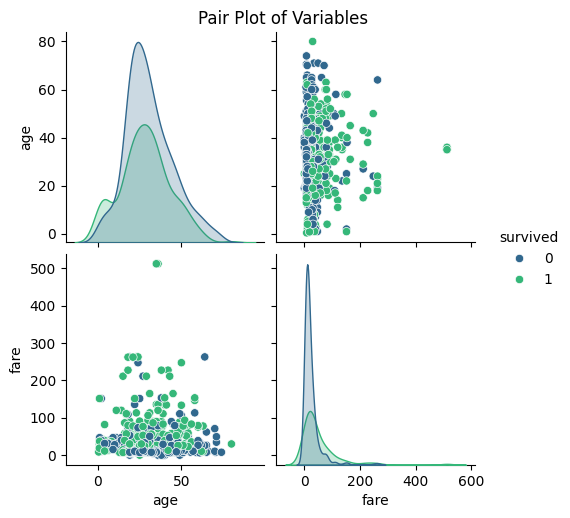

In [ ]:
data_pair_plot = data_con[['survived', 'age', 'fare', 'class']]

# Create a pair plot
sns.pairplot(data_pair_plot, hue='survived', diag_kind='kde', kind='scatter', palette='viridis')
plt.suptitle('Pair Plot of Variables', y=1.02)  # Adjust title and its position
plt.show()

<ipython-input-53-522c7bb1c45a>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='sex', y='age', hue='survived', data=data_con, dodge=True, join=False, markers='D', capsize=0.1, estimator=np.mean)


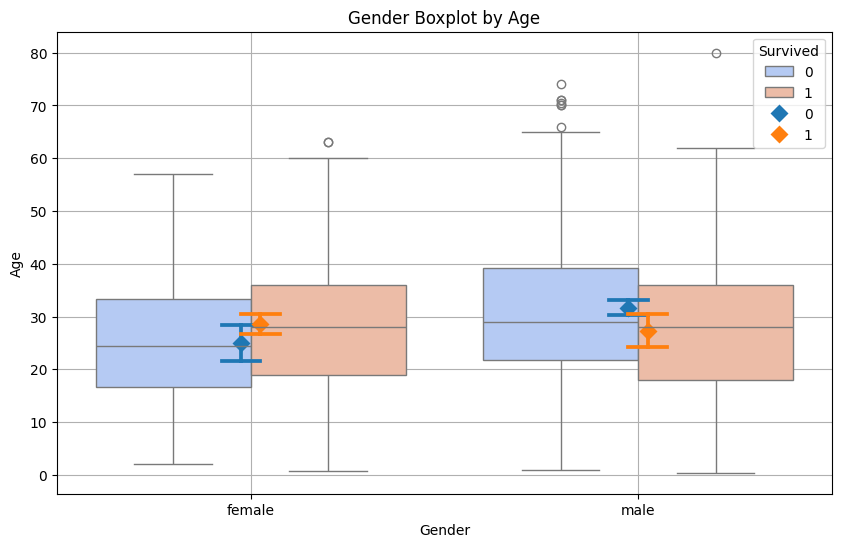

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='sex', y='age', hue='survived', data=data_con, palette='coolwarm')
sns.pointplot(x='sex', y='age', hue='survived', data=data_con, dodge=True, join=False, markers='D', capsize=0.1, estimator=np.mean)

# Add enhancements
plt.title('Gender Boxplot by Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.grid(True)
plt.show()

<ipython-input-54-9dd3236fb4f7>:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='class', y='fare', hue='survived', data=data_con, dodge=True, join=False,  markers='o', capsize=0.1, estimator=np.mean)


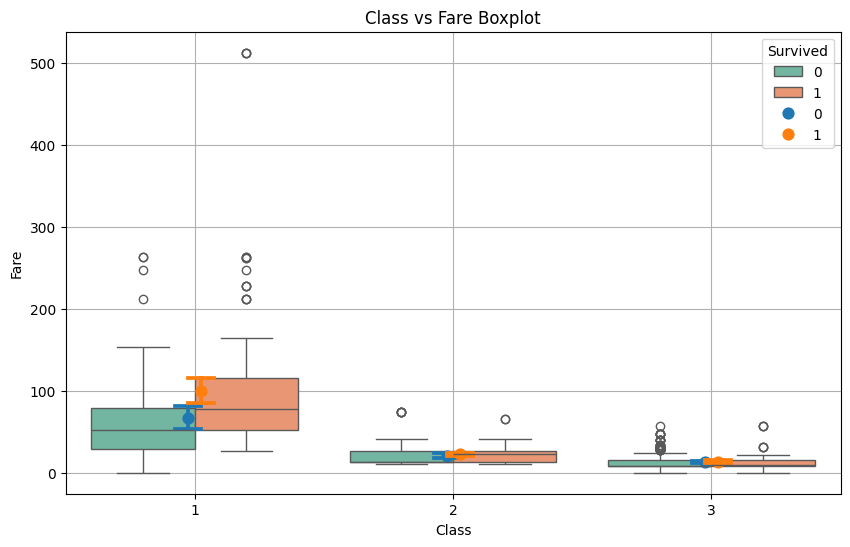

In [ ]:
# Create a box plot with mean points
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='class', y='fare', hue='survived', data=data_con, palette='Set2')
sns.pointplot(x='class', y='fare', hue='survived', data=data_con, dodge=True, join=False,  markers='o', capsize=0.1, estimator=np.mean)

# Add enhancements
plt.title('Class vs Fare Boxplot')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.grid(True)
plt.show()


Continuous variable as factor

In [ ]:
data_con_fac = data_con.copy()

# Categorize 'age' using pandas.cut
data_con_fac['age'] = pd.cut(data_con['age'],
                             bins=[-float('inf'), 15, 50, float('inf')],
                             labels=['child', 'adult', 'senior'])
data_con_fac['survived'] = data_con_fac['survived'].astype(int)


In [ ]:
mod_0 = smf.glm(formula='survived ~ 1', data=data_con_fac,
                family=sm.families.Binomial()).fit()
print("Baseline Model Summary:")
print(mod_0.summary())

Baseline Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -480.45
Date:                Tue, 22 Apr 2025   Deviance:                       960.90
Time:                        17:23:23   Pearson chi2:                     712.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3868      0

In [ ]:
mod_age_fac = smf.glm(formula='survived ~ age', data=data_con_fac,
                      family=sm.families.Binomial()).fit()
print("Model with Age Factor Summary:")
print(mod_age_fac.summary())

Model with Age Factor Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -473.53
Date:                Tue, 22 Apr 2025   Deviance:                       947.05
Time:                        17:23:23   Pearson chi2:                     712.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01927
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      

In [ ]:
# Calculate the exponentiated coefficients for odds ratios
odds_ratios = np.exp(mod_age_fac.params)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
Intercept        1.441176
age[T.adult]     0.434670
age[T.senior]    0.346939
dtype: float64


Is the chance decreasing with increasing age?

In [ ]:
anova(mod_age_fac,mod_0,test="Chisq")

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,709,947.053144,NaN,NaN,NaN,NaN
1,711,960.903739,-2.0,-13.850595,13.850595,0.000983


Age as continuous variable

In [ ]:
data_con_fac['survived'] = data_con_fac['survived'].astype(int)

mod_age = smf.glm(formula='survived ~ I(age / 10)', data=data_con,
                  family=sm.families.Binomial()).fit()
print("Model Summary with Age Scaled by Decades:")
print(mod_age.summary())

odds_ratios = np.exp(mod_age.params)
print("Odds Ratios for Age Increase by Decade:")
print(odds_ratios)

Model Summary with Age Scaled by Decades:
                       Generalized Linear Model Regression Results                        
Dep. Variable:     ['survived[0]', 'survived[1]']   No. Observations:                  712
Model:                                        GLM   Df Residuals:                      710
Model Family:                            Binomial   Df Model:                            1
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -478.01
Date:                            Tue, 22 Apr 2025   Deviance:                       956.03
Time:                                    17:23:23   Pearson chi2:                     712.
No. Iterations:                                 4   Pseudo R-squ. (CS):           0.006827
Covariance Type:                        nonrobust                                         
                  coef    std err          z    

Question:

* With increasing age by 10 years, chance to survive decreased by 11 %.

* What do you think about causality in this result?

In [ ]:
anova(mod_age,mod_0,test="Chisq")

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,710,956.026205,NaN,NaN,NaN,NaN
1,711,960.903739,-1.0,-4.877534,4.877534,0.027208


Question:

* Can we compare by deviance test models `mod_age` and `mod_age_fac`?
* Which model do you prefere and why?
* For which approach (factorized or continuous) saturated model is useful and why?


In [ ]:
# nemůžeme je porovnat, protože nejsou modely vnořené.

In [ ]:
"""
Preference pro mod_age (spojitý):

Jednoduchost (Parsimony): Má méně parametrů (jen jeden pro věk). Jednodušší modely jsou často preferovány (Occamova břitva), pokud dobře popisují data.
Interpretovatelnost: Koeficient má přímou interpretaci jako změna log-šance přežití na každých 10 let věku.
Generalizace: Může lépe generalizovat na nová data, pokud je skutečný vztah přibližně lineární, a zabraňuje přeučení (overfitting) na šum v jednotlivých věkových skupinách.



Preference pro mod_age_fac (kategorický):

Flexibilita: Dokáže zachytit jakýkoli, i složitý nelineární vztah mezi věkem a pravděpodobností přežití bez předpokladu konkrétního tvaru.
Potenciálně lepší fit: nižší deviance při skutečném nelineárním tvaru závislosti
"""

In [ ]:
# je uzitecny pro faktorizovany, ale ve spojitem muzeme pak odpovedet na otazky, ktere nam faktorizovany neda (napr. rozdil mezi 25 a 35 letym)

Your turn:

Consider a model with continuos variables `age`, `fare`, and any factor variable.

* Create factor `child`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare`, where each level break is by 10-20 pounds, 140 max.
* Estimate a model, where the chance of survival depends on factorized `fare` and `sex` and `child`.
* What percentage is the chance of survival lower for adult compare to child?
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket?
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2, chi2_contingency
import matplotlib.pyplot as plt



In [ ]:
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [ ]:
# ------------------------------------------------------------------------------
# 1) LOAD & CLEAN THE DATA
# ------------------------------------------------------------------------------

# Binary flag: 1 = child (<18 yr), 0 = adult
titanic["child"] = (titanic["age"] < 18).astype(float)

# Discrete fare bands – left‑closed, right‑open: 0‑10, 10‑20, …, 130‑140, 140+
fare_bins   = list(range(0, 141, 10)) + [np.inf]
fare_labels = [f"{lo}-{lo+10}" for lo in range(0, 140, 10)] + ["140+"]
titanic["fare_cat"] = pd.cut(titanic["fare"],
                             bins=fare_bins,
                             labels=fare_labels,
                             right=False)

# Keep only rows with complete data for the variables we need
data = titanic.dropna(subset=["survived", "sex", "child",
                              "fare_cat", "fare", "age"])

fare_cat
0-10       236
10-20      155
20-30      115
30-40       56
40-50       14
50-60       31
60-70       10
70-80       28
80-90       13
90-100       8
100-110      4
110-120      6
120-130      4
130-140      6
140+        28
Name: count, dtype: int64


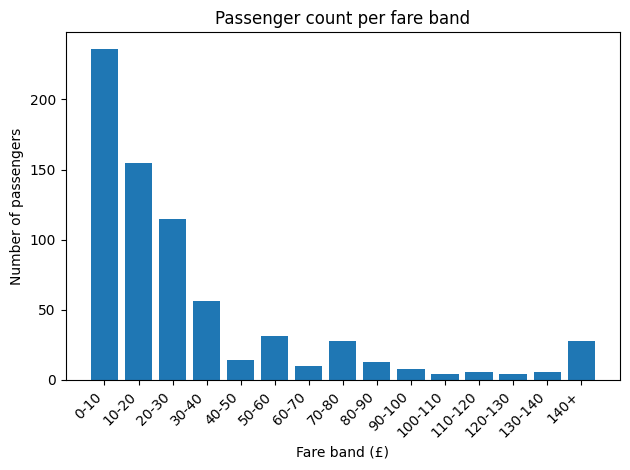

In [ ]:
counts = (data["fare_cat"]
          .value_counts(sort=False)           # keep the logical bin order
          .reindex(fare_labels))              # ensure missing bands show as zero

print(counts)

fig, ax = plt.subplots()
ax.bar(counts.index.astype(str), counts.values)
ax.set_xlabel("Fare band (£)")
ax.set_ylabel("Number of passengers")
ax.set_title("Passenger count per fare band")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Toto může být průšvih, protože nízké počty v binech mohou způsobit velké rozptyly regresních parametrů a tím i zvláštní p-values.
Věrohodnostní testy na otázky "Má vyšší cena jízdenky vliv na přežití?" mají větší sílu, když jsou hodnoty v binech rovnoměrně rozložené.

In [ ]:
# ------------------------------------------------------------------------------
# 2) MODEL 1 – survival ~ fare_cat + sex + child
#    (Logistic regression; ‘survived’ is already 0/1)
# ------------------------------------------------------------------------------
model1 = smf.logit("survived ~ C(fare_cat) + C(sex) + child",
                   data=data).fit()
print(model1.summary())

         Current function value: 0.478488
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                           16
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2916
Time:                        17:27:38   Log-Likelihood:                -341.64
converged:                      False   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.934e-50
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2798      0.229      1.224      0.221      -0.168       0.728
C(fare_cat)[T.10-20]       0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Máme warning ohledně konvergence - to je pravděpodobně způsobené nítkým počtem pozorování v binech. I koeficient 22.22 u 120-130 je šíleně velký.

Máme v zásadě dvě možnosti:
* sloučit biny
* ridge regresi - fit_regularized(alpha=λ)

SLOUČÍME BINY

In [ ]:
data = data.copy()

bins   = [0, 10, 20, 30, 40, 60, 70, 80, 90, 100, 140, np.inf]
labels = ["0-10", "10-20", "20-30", "30-40",
          "40-60", "60-70", "70-80", "80-90", "90-100", "100-140", "140+"]

data.pop("fare_cat")                     # drop starý
data["fare_cat"] = pd.cut(data["fare"],
                        bins=bins,
                        labels=labels,
                        right=False).astype("category")


print(data["fare_cat"].value_counts(sort=False))

fare_cat
0-10       236
10-20      155
20-30      115
30-40       56
40-60       45
60-70       10
70-80       28
80-90       13
90-100       8
100-140     20
140+        28
Name: count, dtype: int64


In [ ]:
# ------------------------------------------------------------------------------
# 2) OPRAVENÝ MODEL 1 – survival ~ fare_cat + sex + child
#    (Logistic regression; ‘survived’ is already 0/1)
# ------------------------------------------------------------------------------
model1 = smf.logit("survived ~ C(fare_cat) + C(sex) + child",
                   data=data).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.489872
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                           12
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2747
Time:                        17:27:43   Log-Likelihood:                -349.77
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.021e-49
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2567      0.226      1.134      0.257      -0.187      

Už je to lepší...

In [ ]:
# ---------------------------------------------------------------
# 3) ADULT vs CHILD – % POKLES V SURVIVAL RATE & POMĚR ŠANCÍ (OR)
# ---------------------------------------------------------------

# --- Výpočet rozdílu v průměrných pravděpodobnostech (již existující kód) ---
print("--- Porovnání průměrných pravděpodobností ---")
# Predikujeme průměrnou pravděpodobnost, pokud by všichni byli děti (při zachování jejich ostatních charakteristik)
p_child = model1.predict(data.assign(child=1)).mean()
# Predikujeme průměrnou pravděpodobnost, pokud by všichni byli dospělí (při zachování jejich ostatních charakteristik)
p_adult = model1.predict(data.assign(child=0)).mean()
# Rozdíl v procentních bodech
pct_diff = p_child - p_adult # Změnil jsem znaménko, aby odpovídalo OR (pozitivní efekt dítěte)

print(f"Průměrná P(survival | model) pro dítě:    {p_child:.3f}")
print(f"Průměrná P(survival | model) pro dospělého: {p_adult:.3f}")
# Upravený výpis pro lepší srovnání s OR
if pct_diff > 0:
    print(f"→ Pravděpodobnost přežití dítěte je v průměru o {pct_diff*100:.1f} procentních bodů VYŠŠÍ než u dospělého.")
else:
    print(f"→ Pravděpodobnost přežití dítěte je v průměru o {-pct_diff*100:.1f} procentních bodů NIŽŠÍ než u dospělého.")

print("\n--- Porovnání šancí (Odds Ratio - OR) ---")
# Získáme koeficient pro proměnnou 'child' z modelu
# Koeficient představuje změnu v log(šance) při změně z adult (0) na child (1)
coef_child = model1.params['child']

# Poměr šancí (Odds Ratio) je exponenciála koeficientu
# OR = exp(koeficient)
# OR = odds(survival | child=1) / odds(survival | child=0)  (při konstantních ostatních proměnných)
odds_ratio_child = np.exp(coef_child)

print(f"Koeficient pro 'child': {coef_child:.3f}")
print(f"Poměr šancí (OR) pro dítě vs. dospělého: {odds_ratio_child:.3f}")

# Interpretace OR
if odds_ratio_child > 1:
    print(f"→ Šance (odds) na přežití jsou {odds_ratio_child:.2f}krát VYŠŠÍ pro dítě než pro dospělého,")
    print("  za předpokladu stejného pohlaví a kategorie ceny jízdenky.")
elif odds_ratio_child < 1:
    # Můžeme také říct (1/OR)krát nižší
    print(f"→ Šance (odds) na přežití jsou {odds_ratio_child:.2f}krát nižší (tj. {1/odds_ratio_child:.2f}krát NIŽŠÍ) pro dítě než pro dospělého,")
    print("  za předpokladu stejného pohlaví a kategorie ceny jízdenky.")
else:
    print("→ Šance (odds) na přežití se pro dítě a dospělého neliší,")
    print("  za předpokladu stejného pohlaví a kategorie ceny jízdenky.")

--- Porovnání průměrných pravděpodobností ---
Průměrná P(survival | model) pro dítě:    0.469
Průměrná P(survival | model) pro dospělého: 0.393
→ Pravděpodobnost přežití dítěte je v průměru o 7.6 procentních bodů VYŠŠÍ než u dospělého.

--- Porovnání šancí (Odds Ratio - OR) ---
Koeficient pro 'child': 0.464
Poměr šancí (OR) pro dítě vs. dospělého: 1.590
→ Šance (odds) na přežití jsou 1.59krát VYŠŠÍ pro dítě než pro dospělého,
  za předpokladu stejného pohlaví a kategorie ceny jízdenky.


In [ ]:
# ---------------------------------------------------------------
# 4) ZÁVISÍ SURVIVAL RATE NA FARE (kategorizovaném)?
#    (Likelihood‑ratio test - KONTROLUJE VLIV SEX a CHILD)
# ---------------------------------------------------------------
# TENTO PŘÍSTUP JE VHODNĚJŠÍ, protože testuje přínos 'fare_cat'
# POTÉ, co už jsme vzali v úvahu vliv 'sex' a 'child'.
# Odpovídá na otázku: "Má cena jízdenky vliv na přežití i nad rámec
# vlivu pohlaví a toho, zda jde o dítě?"

print("--- Likelihood-Ratio Test (Preferovaná metoda) ---")
# Model 0: Bez 'fare_cat' (Nulová hypotéza: fare_cat nemá dodatečný vliv)
model0 = smf.logit("survived ~ C(sex) + child", data=data).fit(disp=0) # disp=0 potlačí výpis z fitování

# Model 1: S 'fare_cat' (Alternativní hypotéza: fare_cat má dodatečný vliv)
# Ujistěte se, že 'fare_cat' je brána jako kategoriální proměnná pomocí C()
model1 = smf.logit("survived ~ C(sex) + child + C(fare_cat)", data=data).fit(disp=0)

# Výpočet Likelihood Ratio statistiky
# Porovnává, o kolik lépe model1 vysvětluje data než model0
LR = 2 * (model1.llf - model0.llf)

# Rozdíl ve stupních volnosti modelů
# Odpovídá počtu parametrů přidaných do model1 (tj. kategorií fare_cat - 1)
df_diff = model1.df_model - model0.df_model

# Výpočet p-hodnoty pomocí chi-kvadrát rozdělení
# Testuje, zda je zlepšení modelu (LR) statisticky významné
pval = chi2.sf(LR, df_diff)

print(f"LR χ² = {LR:.2f} s {df_diff:.0f} stupni volnosti   →   p-hodnota = {pval:.4g}")
if pval < 0.05:
    print("Závěr: Zamítáme nulovou hypotézu. Přidání 'fare_cat' statisticky významně zlepšuje model (p < 0.05).")
    print("       Zdá se, že cena jízdenky má vliv na přežití i po zohlednění pohlaví a věku (dítě/dospělý).")
else:
    print("Závěr: Nezamítáme nulovou hypotézu (p >= 0.05).")
    print("       Přidání 'fare_cat' nepřináší statisticky významné zlepšení modelu, když už kontrolujeme pohlaví a věk.")
    print("       Nemáme dostatek důkazů tvrdit, že cena jízdenky má nezávislý vliv na přežití v tomto modelu.")

print("\n" + "="*60 + "\n") # Oddělovač

# ---------------------------------------------------------------
# Chi-kvadrát test nezávislosti (MÉNĚ VHODNÝ V TOMTO KONTEXTU)
# ---------------------------------------------------------------
# TENTO PŘÍSTUP JE MÉNĚ VHODNÝ pro zodpovězení původní otázky v kontextu
# ostatních proměnných, protože testuje pouze PŘÍMOU (marginální) asociaci
# mezi 'survived' a 'fare_cat', aniž by kontroloval vliv 'sex' nebo 'child'.
# Výsledek může být ovlivněn tím, že např. ženy (které měly vyšší šanci na přežití)
# mohly mít zároveň dražší lístky. Test nekontroluje tyto "zavádějící" (confounding) faktory.
#
# print("--- Chi-kvadrát test nezávislosti (Méně vhodná metoda) ---")
# # 1. Vytvoření kontingenční tabulky
# contingency_table = pd.crosstab(data['survived'], data['fare_cat'])
# print("Kontingenční tabulka:")
# print(contingency_table)
# print("-" * 30)
#
# # 2. Provedení Chi-kvadrát testu
# chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
#
# # 3. Výpis výsledků
# print(f"Chi-squared Test Statistic: {chi2_stat:.2f}")
# print(f"Degrees of Freedom: {dof}")
# print(f"P-value: {p_value:.4g}")
# if p_value < 0.05:
#     print("Závěr: Existuje statisticky významná asociace mezi 'fare_cat' a 'survived' (p < 0.05),")
#     print("       ale tento test neříká, zda je tento vztah nezávislý na jiných faktorech (sex, child).")
# else:
#     print("Závěr: Nebyla nalezena statisticky významná asociace mezi 'fare_cat' a 'survived' (p >= 0.05).")

--- Likelihood-Ratio Test (Preferovaná metoda) ---
LR χ² = 47.67 s 10 stupni volnosti   →   p-hodnota = 7.139e-07
Závěr: Zamítáme nulovou hypotézu. Přidání 'fare_cat' statisticky významně zlepšuje model (p < 0.05).
       Zdá se, že cena jízdenky má vliv na přežití i po zohlednění pohlaví a věku (dítě/dospělý).




Nulová hypotéza je, že všechny fare bands mají nulový koeficient. Test výše tuto nulovou hypotézu zamítá => všechny fare bands mají nějaký vliv => SURVIVAL RATE ZÁVISÍ NA FARE

In [ ]:
# ---------------------------------------------------------------
# 5) SPOJITÁ-FARE MODEL   survived ~ fare
#    (log‑odds linear ⇒ odds grow exponentially)
# ---------------------------------------------------------------
m2   = smf.logit("survived ~ fare", data=data).fit()
beta = m2.params["fare"]
OR10 = np.exp(beta * 10)
print(m2.summary())
print(f"\nKaždých £10 navíc zvýší poměr šancí na přežití o {OR10:.2f}.")

Optimization terminated successfully.
         Current function value: 0.631130
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                 0.06559
Time:                        17:27:53   Log-Likelihood:                -450.63
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.809e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8968      0.108     -8.334      0.000      -1.108      -0.686
fare           0.0160      0.

In [ ]:
# ---------------------------------------------------------------
# 6) AGE + FARE MODEL   survived ~ age + fare
# ---------------------------------------------------------------
m3 = smf.logit("survived ~ age + fare", data=data).fit()
print(m3.summary())

Optimization terminated successfully.
         Current function value: 0.624185
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                 0.07587
Time:                        17:27:55   Log-Likelihood:                -445.67
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.286e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4171      0.186     -2.243      0.025      -0.782      -0.053
age           -0.0176      0.

Obě proměnné jsou signifikantní + interpretabilita.

In [ ]:
m4 = smf.logit("survived ~ age + C(fare_cat)", data=data).fit()
print(m4.summary())

Optimization terminated successfully.
         Current function value: 0.597600
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.1152
Time:                        17:37:54   Log-Likelihood:                -426.69
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.083e-18
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8417      0.226     -3.727      0.000      -1.284      

Lepší fit